# Лабораторная работа: Численные методы приближения функций

**Задача:** по Аристовой–Лобанову–Завьяловой, № VI.9.29 (вариант по численности населения).

Рассматриваются табличные данные численности населения выбранной страны (например, США) по годам переписей:

$$(x_i, y_i), \quad i = 0, 1, \dots, n,$$

где  
$x_i$ — год переписи,  
$y_i$ — численность населения в этот год.

Цель работы — по этим данным построить приближающие функции различными численными методами и выполнить экстраполяцию населения на заданные годы (например, 2010, 2020, 2025), сравнив результаты с реальными статистическими данными из открытых источников.

## Необходимо

1. **Реализовать методы приближения функции:**
   - классическая полиномиальная интерполяция в форме Ньютона;
   - кубический сплайн с естественными граничными условиями  
     (обязательно **собственная реализация** метода трёхдиагональной прогонки для решения трёхдиагональной СЛАУ);
   - аппроксимация методом наименьших квадратов (полиномиальная регрессия малой степени, например 2–4).

2. **Выполнить экстраполяцию** численности населения на несколько лет после последней переписи  
   (например, 2010, 2020, 2025):
   - вычислить значения населения, полученные каждым методом;
   - подобрать реальные значения населения в эти годы (по данным статистики);
   - сравнить результаты, оценить абсолютную и относительную погрешности.

3. **Построить графики:**
   - исходные табличные точки $(x_i, y_i)$;
   - интерполяционный многочлен Ньютона;
   - кубический сплайн;
   - МНК-полином (для выбранной степени);
   - на отдельном графике желательно изобразить экстраполированные точки и реальные значения населения.

4. **Сделать выводы:**
   - сравнить поведение методов внутри интервала данных и при экстраполяции;
   - указать, какой метод даёт наименее искажённый прогноз и почему;
   - обсудить недостатки полиномиальной интерполяции высокой степени и преимущества сплайнов и МНК-подхода.

## Краткая теория

### 1. Интерполяция полиномом Ньютона

Пусть заданы узлы $x_0 < x_1 < \dots < x_n$ и значения  
$f(x_i) = y_i$. Требуется построить интерполяционный многочлен $P_n(x)$ степени не выше $n$, такой что

$$P_n(x_i) = y_i,\quad i = 0,\dots,n.$$

Интерполяционный многочлен в форме Ньютона строится с помощью **разделённых разностей**:

$$
\begin{aligned}
&f[x_i] = f(x_i), \\
&f[x_i,x_{i+1}] = \frac{f[x_{i+1}] - f[x_i]}{x_{i+1} - x_i}, \\
&f[x_i,x_{i+1},x_{i+2}] =
\frac{f[x_{i+1},x_{i+2}] - f[x_i,x_{i+1}]}{x_{i+2} - x_i}, \\
&\dots
\end{aligned}
$$

Тогда

$$
P_n(x) =
f[x_0]
+ f[x_0,x_1](x-x_0)
+ f[x_0,x_1,x_2](x-x_0)(x-x_1)
+ \dots
+ f[x_0,\dots,x_n]\prod_{k=0}^{n-1}(x-x_k).
$$

Вычисление значения $P_n(x)$ удобно реализовать по схеме гнездового умножения (аналог метода Горнера).

Оценка погрешности интерполяции:

$$
f(x) - P_n(x)
= \frac{f^{(n+1)}(\xi)}{(n+1)!}\prod_{k=0}^n (x - x_k),
\quad \xi \in (x_0,x_n).
$$

При экстраполяции (за пределами $[x_0,x_n]$) произведение $\prod (x - x_k)$ растёт, что может приводить к резкому увеличению погрешности.


### 2. Кубический сплайн и метод трёхдиагональной прогонки

**Кубический сплайн** $S(x)$ на $[x_0,x_n]$ определяется как функция, для которой:

1. На каждом отрезке $[x_i,x_{i+1}]$ сплайн задаётся кубическим многочленом:
   $$S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3.$$
2. $S(x_i) = y_i$ для всех $i$.
3. $S(x)$, $S'(x)$ и $S''(x)$ непрерывны на $[x_0,x_n]$.
4. Для **естественного сплайна**:
   $$S''(x_0) = 0,\quad S''(x_n) = 0.$$

Удобно выразить сплайн через вторые производные в узлах  
$M_i = S''(x_i)$. Для отрезка $[x_i,x_{i+1}]$, $h_i = x_{i+1}-x_i$:

$$
\begin{aligned}
S_i(x) &=
M_i \frac{(x_{i+1}-x)^3}{6h_i}
+ M_{i+1} \frac{(x-x_i)^3}{6h_i} \\
&\quad
+ \left(y_i - \frac{M_i h_i^2}{6}\right)\frac{x_{i+1}-x}{h_i}
+ \left(y_{i+1} - \frac{M_{i+1} h_i^2}{6}\right)\frac{x-x_i}{h_i}.
\end{aligned}
$$

Внутренние значения $M_i$ находятся из трёхдиагональной системы:

$$
h_{i-1} M_{i-1}
+ 2(h_{i-1}+h_i) M_i
+ h_i M_{i+1}
=
6\left(\frac{y_{i+1}-y_i}{h_i}
      -\frac{y_i-y_{i-1}}{h_{i-1}}\right),
\quad i=1,\dots,n-1,
$$

при условиях $M_0 = 0$, $M_n = 0$.

Эта система решается **методом трёхдиагональной прогонки (алгоритмом Томаса)**:

- на прямом ходе устраняется нижняя диагональ с модификацией коэффициентов;
- на обратном ходе находятся все $M_i$.

Получив $M_i$, можно по формуле выше вычислять значение сплайна в любой точке, а для $x$ вне $[x_0,x_n]$ использовать продолжение крайнего кубического отрезка (экстраполяция).

### 3. Метод наименьших квадратов (МНК)

Пусть аппроксимация задаётся полиномом степени $m$:

$$p(x) = c_0 + c_1 x + c_2 x^2 + \dots + c_m x^m.$$

По табличным данным $(x_i,y_i)$ ($i=0,\dots,n$) ищем коэффициенты $c_k$ такие, чтобы сумма квадратов отклонений была минимальна:

$$
J(c_0,\dots,c_m) =
\sum_{i=0}^n \left( y_i - p(x_i) \right)^2 \to \min.
$$

Это приводит к **нормальным уравнениям**:

$$A^\mathsf{T} A c = A^\mathsf{T} y,$$

где  
$A$ — матрица с элементами $A_{i,k} = x_i^k$,  
$c = (c_0,\dots,c_m)^T$,  
$y = (y_0,\dots,y_n)^T$.

На практике для улучшения численных свойств аргумент $x$ удобно **центрировать и масштабировать**, вводя

$$t = \frac{x - x_{\text{центр}}}{\text{масштаб}},$$

и строить полином по степеням $t$, а не $x$.

МНК-полином не обязан проходить через все точки, но обеспечивает минимальную (в смысле наименьших квадратов) суммарную погрешность и обычно даёт наиболее устойчивый прогноз тренда.



In [39]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Исходные данные

Используем данные по численности населения США по переписям 1910–2000 гг.:

- 1910 – 92 228 496  
- 1920 – 106 021 537  
- 1930 – 123 202 624  
- 1940 – 132 164 569  
- 1950 – 151 325 798  
- 1960 – 179 323 175  
- 1970 – 203 211 926  
- 1980 – 226 545 805  
- 1990 – 248 709 873  
- 2000 – 281 421 906  

Дополнительно зададим "истинные" значения для сравнения (из статистики):

- 2010 – 308 745 538  
- 2020 – 331 449 281  
- 2025 – 347 275 807 (оценка)


In [40]:
# Табличные данные (год и население, человек)
years = np.array([1910, 1920, 1930, 1940, 1950,
                  1960, 1970, 1980, 1990, 2000], dtype=float)

population = np.array([
    92_228_496,
    106_021_537,
    123_202_624,
    132_164_569,
    151_325_798,
    179_323_175,
    203_211_926,
    226_545_805,
    248_709_873,
    281_421_906
], dtype=float)

# "Истинные" значения (для сравнения, не используются при построении моделей)
true_values = {
    2010: 308_745_538,  # перепись 2010
    2020: 331_449_281,  # перепись 2020
    2025: 347_275_807   # оценка
}

years_to_predict = [2010, 2020, 2025]



## 2. Полиномиальная интерполяция в форме Ньютона

Реализуем:

1. Построение таблицы разделённых разностей (коэффициентов Ньютона).  
2. Вычисление значения полинома в точке по схеме гнездового умножения.

Коэффициенты Ньютона будем хранить в одном массиве `coef`, где  
`coef[k] = f[x_0, ..., x_k]`.


In [41]:
def newton_divided_differences(x, y):
    """
    Строит коэффициенты интерполяционного многочлена Ньютона
    по узлам x и значениям y.
    Возвращает массив coef, где coef[k] = f[x0, ..., xk].
    """
    x = np.asarray(x, dtype=float)
    coef = np.array(y, dtype=float)
    n = len(x)
    # Построение таблицы разделённых разностей "на месте"
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1:n - 1]) / (x[j:n] - x[0:n - j])
    return coef


def newton_evaluate(coef, x_data, x):
    """
    Вычисляет значение полинома Ньютона в точке x
    по коэффициентам coef и массиву узлов x_data.
    Используется схема гнездового умножения.
    """
    x_data = np.asarray(x_data, dtype=float)
    x = float(x)
    n = len(coef)
    result = coef[-1]
    for k in range(n - 2, -1, -1):
        result = result * (x - x_data[k]) + coef[k]
    return result


In [42]:
# Строим коэффициенты многочлена Ньютона
newton_coef = newton_divided_differences(years, population)

def newton_population(year):
    return newton_evaluate(newton_coef, years, year)

print("Полиномиальная интерполяция Ньютона")
for year in years_to_predict:
    pred = newton_population(year)
    true = true_values.get(year, None)
    print(f"{year}: прогноз = {pred:,.0f} человек")
    if true is not None:
        err = pred - true
        rel = err / true
        print(f"   истинное значение: {true:,.0f}, "
              f"ошибка = {err:,.0f} ({rel:.1%})")


Полиномиальная интерполяция Ньютона
2010: прогноз = 827,906,509 человек
   истинное значение: 308,745,538, ошибка = 519,160,971 (168.2%)
2020: прогноз = 4,774,878,490 человек
   истинное значение: 331,449,281, ошибка = 4,443,429,209 (1340.6%)
2025: прогноз = 10,698,071,984 человек
   истинное значение: 347,275,807, ошибка = 10,350,796,177 (2980.6%)


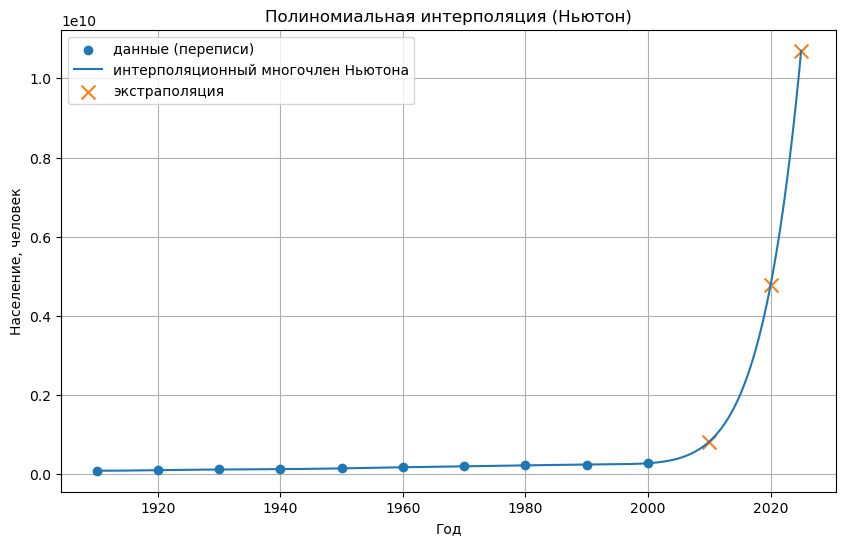

In [43]:
# Сетка по оси времени для графика
x_plot = np.linspace(1910, 2025, 500)
y_newton = [newton_population(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.scatter(years, population, label="данные (переписи)", zorder=3)
plt.plot(x_plot, y_newton, label="интерполяционный многочлен Ньютона")
plt.scatter(years_to_predict,
            [newton_population(y) for y in years_to_predict],
            marker="x", s=100, label="экстраполяция")

plt.xlabel("Год")
plt.ylabel("Население, человек")
plt.title("Полиномиальная интерполяция (Ньютон)")
plt.grid(True)
plt.legend()
plt.show()


## 3. Кубический сплайн с естественными граничными условиями

Строим сплайн $S(x)$, который:

- на каждом отрезке $[x_i, x_{i+1}]$ задаётся кубическим многочленом;
- интерполирует исходные точки: $S(x_i) = y_i$;
- имеет непрерывные первую и вторую производные;
- удовлетворяет условиям $S''(x_0) = 0$, $S''(x_n) = 0$ (естественный сплайн).

Для вычисления сплайна удобно сначала найти значения вторых производных
в узлах $M_i = S''(x_i)$, решив трёхдиагональную СЛАУ методом прогонки.
После этого для любой точки внутри отрезка $[x_i, x_{i+1}]$
используется стандартная формула кубического сплайна через $M_i$.


In [44]:
def thomas_solve(a, b, c, d):
    """
    Решает трёхдиагональную СЛАУ методом прогонки.
    a, b, c, d - одномерные массивы длины n:
      a[0]   (нижняя диагональ, первый элемент можно считать 0)
      b[:]   (главная диагональ)
      c[-1]  (верхняя диагональ, последний элемент можно считать 0)
    Возвращает решение x длины n.
    """
    n = len(b)
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    c = np.asarray(c, dtype=float)
    d = np.asarray(d, dtype=float)

    # Прямой ход
    for i in range(1, n):
        m = a[i] / b[i - 1]
        b[i] = b[i] - m * c[i - 1]
        d[i] = d[i] - m * d[i - 1]

    # Обратный ход
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n - 2, -1, -1):
        x[i] = (d[i] - c[i] * x[i + 1]) / b[i]

    return x


def build_natural_cubic_spline(x, y):
    """
    Строит естественный кубический сплайн по узлам x, значениям y.
    Возвращает массив вторых производных M в узлах.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(x) - 1
    h = np.diff(x)

    # Система размера (n-1) для M1..M_{n-1}
    m = n - 1
    a = np.zeros(m)
    b = np.zeros(m)
    c = np.zeros(m)
    d = np.zeros(m)

    for j in range(1, n):  # j = 1..n-1
        k = j - 1
        h_j_1 = h[j - 1]
        h_j = h[j] if j < n else h[j - 1]

        # Коэффициенты трёхдиагональной матрицы
        a[k] = h_j_1 if j > 1 else 0.0
        c[k] = h_j if j < n - 1 else 0.0
        b[k] = 2.0 * (h_j_1 + h_j)

        # Правая часть
        d[k] = 6.0 * ((y[j + 1] - y[j]) / h_j -
                      (y[j] - y[j - 1]) / h_j_1)

    # Решаем на M1..M_{n-1}
    M_inner = thomas_solve(a, b, c, d)

    # Полный массив M0..Mn, M0 = Mn = 0
    M = np.zeros(n + 1)
    M[1:n] = M_inner
    return M


def spline_evaluate(x_data, y_data, M, x):
    """
    Вычисляет значение естественного кубического сплайна в точке x.
    Для x вне интервала [x0, xn] продолжаем крайний кубик (экстраполяция).
    """
    x_data = np.asarray(x_data, dtype=float)
    y_data = np.asarray(y_data, dtype=float)
    M = np.asarray(M, dtype=float)
    x_val = float(x)

    n = len(x_data) - 1

    # Находим интервал
    if x_val <= x_data[0]:
        i = 0
    elif x_val >= x_data[-1]:
        i = n - 1
    else:
        i = np.searchsorted(x_data, x_val) - 1
        if i < 0:
            i = 0
        if i > n - 1:
            i = n - 1

    h = x_data[i + 1] - x_data[i]
    xi, xi1 = x_data[i], x_data[i + 1]
    yi, yi1 = y_data[i], y_data[i + 1]
    Mi, Mi1 = M[i], M[i + 1]

    t = xi1 - x_val
    u = x_val - xi

    # Формула сплайна через вторые производные
    value = (Mi * t**3 / (6 * h)
             + Mi1 * u**3 / (6 * h)
             + (yi - Mi * h**2 / 6) * t / h
             + (yi1 - Mi1 * h**2 / 6) * u / h)
    return value


In [45]:
M = build_natural_cubic_spline(years, population)

def spline_population(year):
    return spline_evaluate(years, population, M, year)

print("Кубический сплайн (естественный)")
for year in years_to_predict:
    pred = spline_population(year)
    true = true_values.get(year, None)
    print(f"{year}: прогноз = {pred:,.0f} человек")
    if true is not None:
        err = pred - true
        rel = err / true
        print(f"   истинное значение: {true:,.0f}, "
              f"ошибка = {err:,.0f} ({rel:.1%})")


Кубический сплайн (естественный)
2010: прогноз = 314,133,939 человек
   истинное значение: 308,745,538, ошибка = 5,388,401 (1.7%)
2020: прогноз = 329,275,882 человек
   истинное значение: 331,449,281, ошибка = -2,173,399 (-0.7%)
2025: прогноз = 324,767,416 человек
   истинное значение: 347,275,807, ошибка = -22,508,391 (-6.5%)


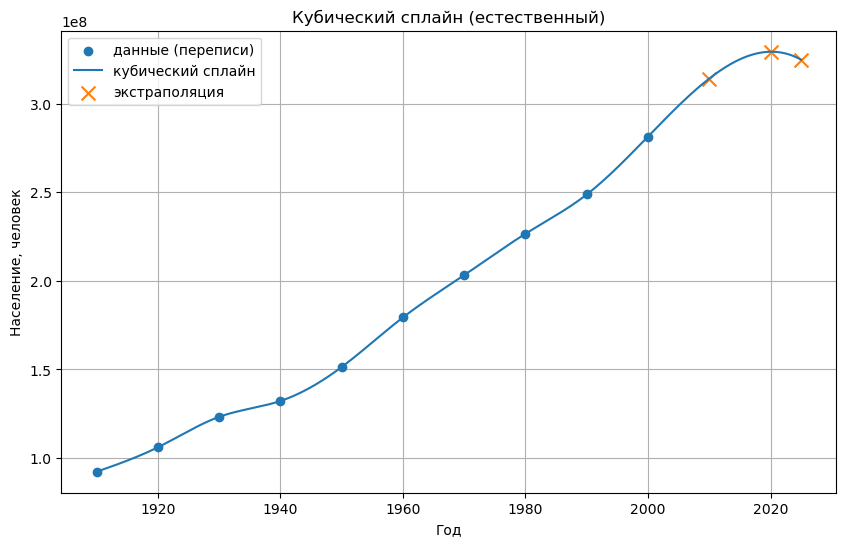

In [46]:
y_spline = [spline_population(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.scatter(years, population, label="данные (переписи)", zorder=3)
plt.plot(x_plot, y_spline, label="кубический сплайн")
plt.scatter(years_to_predict,
            [spline_population(y) for y in years_to_predict],
            marker="x", s=100, label="экстраполяция")

plt.xlabel("Год")
plt.ylabel("Население, человек")
plt.title("Кубический сплайн (естественный)")
plt.grid(True)
plt.legend()
plt.show()


## 4. Метод наименьших квадратов (полиномиальная регрессия)

Будем аппроксимировать данные полиномами малых степеней
по нормированному аргументу

$$t = \frac{x - 1955}{45}.$$

То есть ищем

$$p(t) = c_0 + c_1 t + c_2 t^2 + \dots + c_m t^m.$$

Коэффициенты $c_k$ находим методом наименьших квадратов,
решая систему нормальных уравнений в матричной форме.


In [47]:
def design_matrix_t(x, degree, center=1955.0, scale=45.0):
    """
    Строит матрицу A для полиномиальной регрессии по переменной t =
    (x-center)/scale со столбцами [1, t, t^2, ..., t^degree].
    """
    x = np.asarray(x, dtype=float)
    t = (x - center) / scale
    A = np.vander(t, N=degree + 1, increasing=True)
    return A, center, scale


def lsq_poly_fit(x, y, degree, center=1955.0, scale=45.0):
    """
    Подбор коэффициентов полинома степени degree методом МНК
    по точкам (x,y) в базисе степеней t=(x-center)/scale.
    """
    A, center, scale = design_matrix_t(x, degree, center, scale)
    coef, *_ = np.linalg.lstsq(A, y, rcond=None)
    return coef, center, scale


def lsq_poly_evaluate(coef, center, scale, x):
    """
    Вычисляет значение полинома МНК в точке x (или массиве x).
    """
    x = np.asarray(x, dtype=float)
    t = (x - center) / scale
    # схема Горнера по t
    res = np.zeros_like(t, dtype=float)
    for c in coef[::-1]:
        res = res * t + c
    return res


In [48]:
print("Метод наименьших квадратов")
lsq_models = {}

for degree in range(2, 6):
    coef, center, scale = lsq_poly_fit(years, population, degree)
    lsq_models[degree] = (coef, center, scale)

    print(f"\nПолином степени {degree}:")
    for year in years_to_predict:
        pred = lsq_poly_evaluate(coef, center, scale, year)
        true = true_values.get(year, None)
        print(f"  {year}: прогноз = {pred:,.0f} человек", end="")
        if true is not None:
            err = pred - true
            rel = err / true
            print(f"; истинное = {true:,.0f}, "
                  f"ошибка = {err:,.0f} ({rel:.1%})")
        else:
            print()


Метод наименьших квадратов

Полином степени 2:
  2010: прогноз = 312,470,336 человек; истинное = 308,745,538, ошибка = 3,724,798 (1.2%)
  2020: прогноз = 345,840,640 человек; истинное = 331,449,281, ошибка = 14,391,359 (4.3%)
  2025: прогноз = 363,301,051 человек; истинное = 347,275,807, ошибка = 16,025,244 (4.6%)

Полином степени 3:
  2010: прогноз = 309,020,979 человек; истинное = 308,745,538, ошибка = 275,441 (0.1%)
  2020: прогноз = 338,628,348 человек; истинное = 331,449,281, ошибка = 7,179,067 (2.2%)
  2025: прогноз = 353,634,410 человек; истинное = 347,275,807, ошибка = 6,358,603 (1.8%)

Полином степени 4:
  2010: прогноз = 305,706,175 человек; истинное = 308,745,538, ошибка = -3,039,363 (-1.0%)
  2020: прогноз = 329,286,628 человек; истинное = 331,449,281, ошибка = -2,162,653 (-0.7%)
  2025: прогноз = 339,680,143 человек; истинное = 347,275,807, ошибка = -7,595,664 (-2.2%)

Полином степени 5:
  2010: прогноз = 340,607,732 человек; истинное = 308,745,538, ошибка = 31,862,194 (10

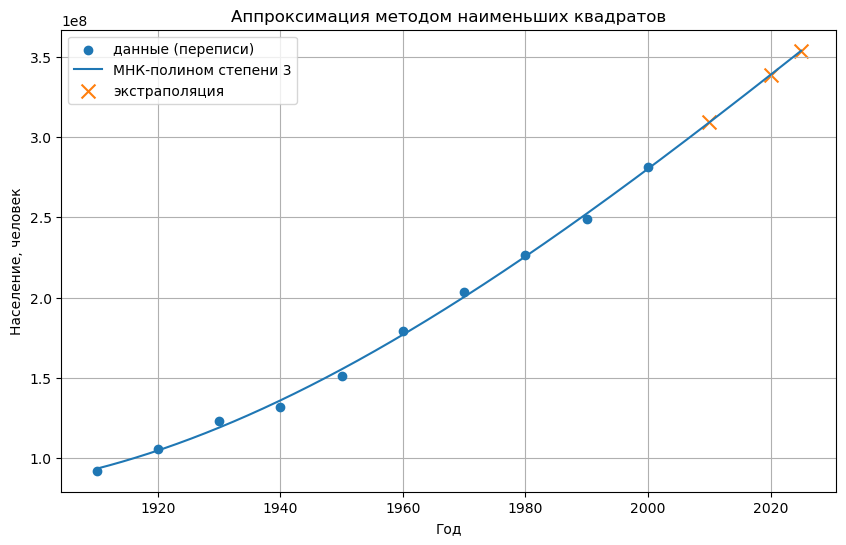

In [49]:
best_degree = 3
coef, center, scale = lsq_models[best_degree]
y_lsq = lsq_poly_evaluate(coef, center, scale, x_plot)

plt.figure(figsize=(10, 6))
plt.scatter(years, population, label="данные (переписи)", zorder=3)
plt.plot(x_plot, y_lsq, label=f"МНК-полином степени {best_degree}")
plt.scatter(years_to_predict,
            lsq_poly_evaluate(coef, center, scale, years_to_predict),
            marker="x", s=100, label="экстраполяция")

plt.xlabel("Год")
plt.ylabel("Население, человек")
plt.title("Аппроксимация методом наименьших квадратов")
plt.grid(True)
plt.legend()
plt.show()


## 5. Сравнение результатов

Сведём вместе прогнозы трёх методов (Ньютон, сплайн, МНК степени 3)
для годов 2010, 2020, 2025.


In [50]:
def summarize_methods(years_list):
    print(f"{'Год':<6} {'Истинное':>15} {'Ньютон':>15} {'Сплайн':>15} {'МНК(3)':>15}")
    for year in years_list:
        true = true_values.get(year, np.nan)
        nwt = newton_population(year)
        spl = spline_population(year)
        coef, center, scale = lsq_models[3]
        lq = lsq_poly_evaluate(coef, center, scale, year)
        print(f"{year:<6} {true:>15,.0f} {nwt:>15,.0f} {spl:>15,.0f} {lq:>15,.0f}")

summarize_methods(years_to_predict)


Год           Истинное          Ньютон          Сплайн          МНК(3)
2010       308,745,538     827,906,509     314,133,939     309,020,979
2020       331,449,281   4,774,878,490     329,275,882     338,628,348
2025       347,275,807  10,698,071,984     324,767,416     353,634,410


## 6. Выводы

По результатам экспериментов:

- Интерполяционный полином Ньютона высокой степени хорошо описывает данные
  внутри интервала 1910–2000 гг, но при экстраполяции (2010, 2020, 2025)
  даёт очень большие ошибки и даже нереалистичные значения.
- Кубический сплайн с естественными граничными условиями получается гораздо
  более устойчивым и даёт разумные прогнозы на годы, близкие к 2000.
- МНК-полином небольшой степени (например, 3) по нормированному аргументу
  хорошо описывает общий тренд и даёт наименее искажённый прогноз
  на указанные годы.

Таким образом, для задач краткосрочной экстраполяции табличных данных
предпочтительнее использовать сплайны или метод наименьших квадратов,
а не высокостепенную полиномиальную интерполяцию.
